In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import svd, norm

# Movie rating data (20 users × 50 movies)
ratings_data = np.array([
    [4, 5, 2, 3, 5, 4, 1, 2, 4, 5, 3, 2, 4, 5, 3, 1, 2, 4, 5, 3, 4, 5, 2, 3, 4, 5, 3, 2, 4, 5, 2, 3, 5, 4, 2, 3, 4, 5, 3, 2, 4, 5, 3, 2, 4, 5, 3, 2, 4, 5],
    [5, 4, 3, 2, 4, 5, 2, 1, 5, 4, 2, 3, 5, 4, 2, 2, 3, 5, 4, 2, 5, 4, 3, 2, 5, 4, 2, 3, 5, 4, 3, 2, 4, 5, 3, 2, 5, 4, 2, 3, 5, 4, 2, 3, 5, 4, 2, 3, 5, 4],
    [2, 3, 5, 4, 3, 2, 4, 5, 2, 3, 5, 4, 2, 3, 5, 4, 5, 2, 3, 5, 2, 3, 4, 5, 2, 3, 5, 4, 2, 3, 4, 5, 3, 2, 5, 4, 2, 3, 5, 4, 2, 3, 5, 4, 2, 3, 5, 4, 2, 3],
    [3, 2, 4, 5, 2, 3, 5, 4, 3, 2, 4, 5, 3, 2, 4, 5, 4, 3, 2, 4, 3, 2, 5, 4, 3, 2, 4, 5, 3, 2, 5, 4, 2, 3, 4, 5, 3, 2, 4, 5, 3, 2, 4, 5, 3, 2, 4, 5, 3, 2],
    [5, 5, 1, 2, 5, 5, 1, 1, 5, 5, 2, 1, 5, 5, 2, 1, 1, 5, 5, 2, 5, 5, 1, 2, 5, 5, 2, 1, 5, 5, 1, 2, 5, 5, 1, 2, 5, 5, 2, 1, 5, 5, 2, 1, 5, 5, 2, 1, 5, 5],
    [1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 5, 1, 1, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1],
    [4, 4, 3, 3, 4, 4, 2, 2, 4, 4, 3, 3, 4, 4, 3, 2, 3, 4, 4, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4],
    [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
    [5, 4, 2, 1, 5, 4, 1, 2, 5, 4, 1, 2, 5, 4, 1, 1, 2, 5, 4, 1, 5, 4, 2, 1, 5, 4, 1, 2, 5, 4, 2, 1, 5, 4, 2, 1, 5, 4, 1, 2, 5, 4, 1, 2, 5, 4, 1, 2, 5, 4],
    [2, 3, 4, 5, 2, 3, 5, 4, 2, 3, 5, 4, 2, 3, 5, 5, 4, 2, 3, 5, 2, 3, 4, 5, 2, 3, 5, 4, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 5, 4, 2, 3, 5, 4, 2, 3, 5, 4, 2, 3],
    [4, 5, 3, 2, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 2, 3, 4, 5, 2, 4, 5, 3, 2, 4, 5, 2, 3, 4, 5, 3, 2, 4, 5, 3, 2, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5],
    [5, 5, 2, 2, 5, 5, 1, 1, 5, 5, 2, 2, 5, 5, 2, 1, 1, 5, 5, 2, 5, 5, 2, 2, 5, 5, 2, 2, 5, 5, 2, 2, 5, 5, 2, 2, 5, 5, 2, 2, 5, 5, 2, 2, 5, 5, 2, 2, 5, 5],
    [1, 2, 5, 4, 1, 2, 5, 5, 1, 2, 5, 4, 1, 2, 5, 5, 5, 1, 2, 5, 1, 2, 5, 4, 1, 2, 5, 4, 1, 2, 5, 4, 1, 2, 5, 4, 1, 2, 5, 4, 1, 2, 5, 4, 1, 2, 5, 4, 1, 2],
    [3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4],
    [4, 3, 3, 4, 4, 3, 4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3],
    [5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 1, 5, 5, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5, 1, 1, 5, 5],
    [2, 1, 5, 5, 2, 1, 5, 5, 2, 1, 5, 5, 2, 1, 5, 5, 5, 2, 1, 5, 2, 1, 5, 5, 2, 1, 5, 5, 2, 1, 5, 5, 2, 1, 5, 5, 2, 1, 5, 5, 2, 1, 5, 5, 2, 1, 5, 5, 2, 1],
    [4, 4, 2, 3, 4, 4, 2, 2, 4, 4, 3, 2, 4, 4, 3, 2, 2, 4, 4, 3, 4, 4, 2, 3, 4, 4, 3, 2, 4, 4, 2, 3, 4, 4, 2, 3, 4, 4, 3, 2, 4, 4, 3, 2, 4, 4, 3, 2, 4, 4],
    [3, 2, 4, 4, 3, 2, 4, 4, 3, 2, 4, 4, 3, 2, 4, 4, 4, 3, 2, 4, 3, 2, 4, 4, 3, 2, 4, 4, 3, 2, 4, 4, 3, 2, 4, 4, 3, 2, 4, 4, 3, 2, 4, 4, 3, 2, 4, 4, 3, 2],
    [5, 4, 1, 2, 5, 4, 1, 1, 5, 4, 2, 1, 5, 4, 2, 1, 1, 5, 4, 2, 5, 4, 1, 2, 5, 4, 2, 1, 5, 4, 1, 2, 5, 4, 1, 2, 5, 4, 2, 1, 5, 4, 2, 1, 5, 4, 2, 1, 5, 4]
])

# Movie titles

movie_titles = [
    "The Godfather", "Star Wars", "Psycho", "Alien", "The Shawshank Redemption",
    "Pulp Fiction", "The Notebook", "Titanic", "The Dark Knight", "Inception",
    "Love Actually", "The Exorcist", "Fight Club", "Forrest Gump", "Pretty Woman",
    "Halloween", "Saw", "The Matrix", "Avatar", "When Harry Met Sally",
    "Goodfellas", "Scarface", "It", "The Conjuring", "Interstellar",
    "The Avengers", "Sleepless in Seattle", "The Silence of the Lambs", "Black Panther",
    "Joker", "La La Land", "Get Out", "The Lord of the Rings", "Jurassic Park",
    "Pride and Prejudice", "The Ring", "Toy Story", "The Lion King", "You've Got Mail",
    "A Nightmare on Elm Street", "Spider-Man", "Iron Man", "The Proposal", "Hereditary",
    "Wonder Woman", "Frozen", "Bridget Jones's Diary", "Scream", "Gravity", "Amélie"
]

df_ratings = pd.DataFrame(ratings_data, 
                          columns=movie_titles,
                          index=[f"User_{i+1}" for i in range(20)])

## Heatmap of the data

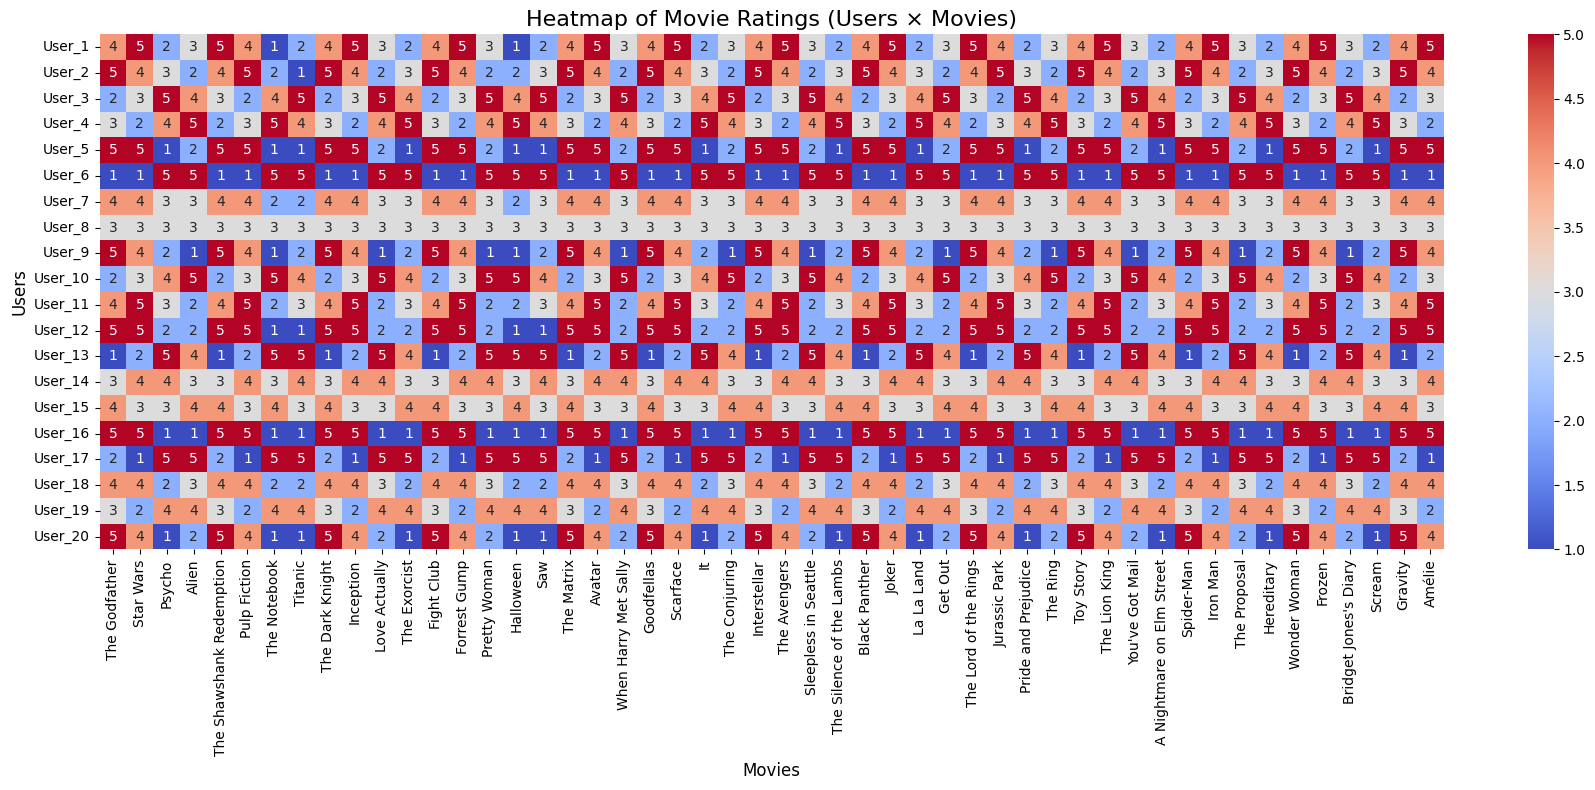

In [2]:
# Set figure size
plt.figure(figsize=(18, 8))

# Create heatmap
sns.heatmap(df_ratings, 
            cmap="coolwarm",   
            annot=True,       # inside the to see the numbers
            cbar=True)

# Titles
plt.title("Heatmap of Movie Ratings (Users × Movies)", fontsize=16)
plt.xlabel("Movies", fontsize=12)
plt.ylabel("Users", fontsize=12)

plt.xticks(rotation=90)  # rotate movie titles for readability
plt.tight_layout()
plt.show()


## Do the SVD

[SVD] Reconstruction Frobenius error: 1.165480e-13  (relative: 1.036771e-15)


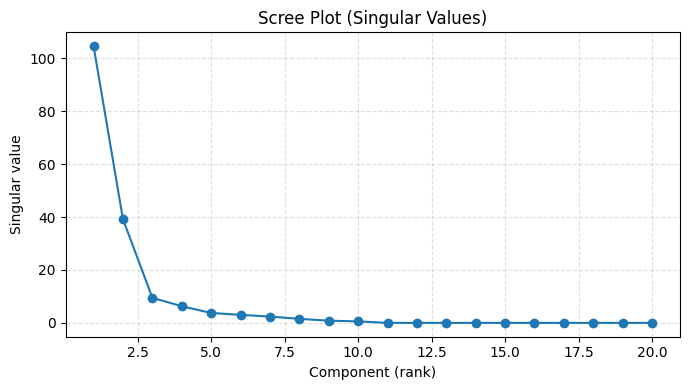

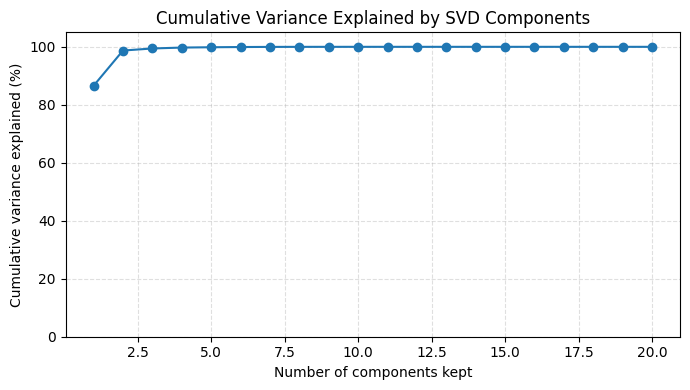

Top 5 singular values: [104.59255551  39.18427782   9.49043759   6.29299237   3.74988108]
Variance explained (%): [86.56803567 12.15009598  0.71273566  0.31337939  0.11127331]


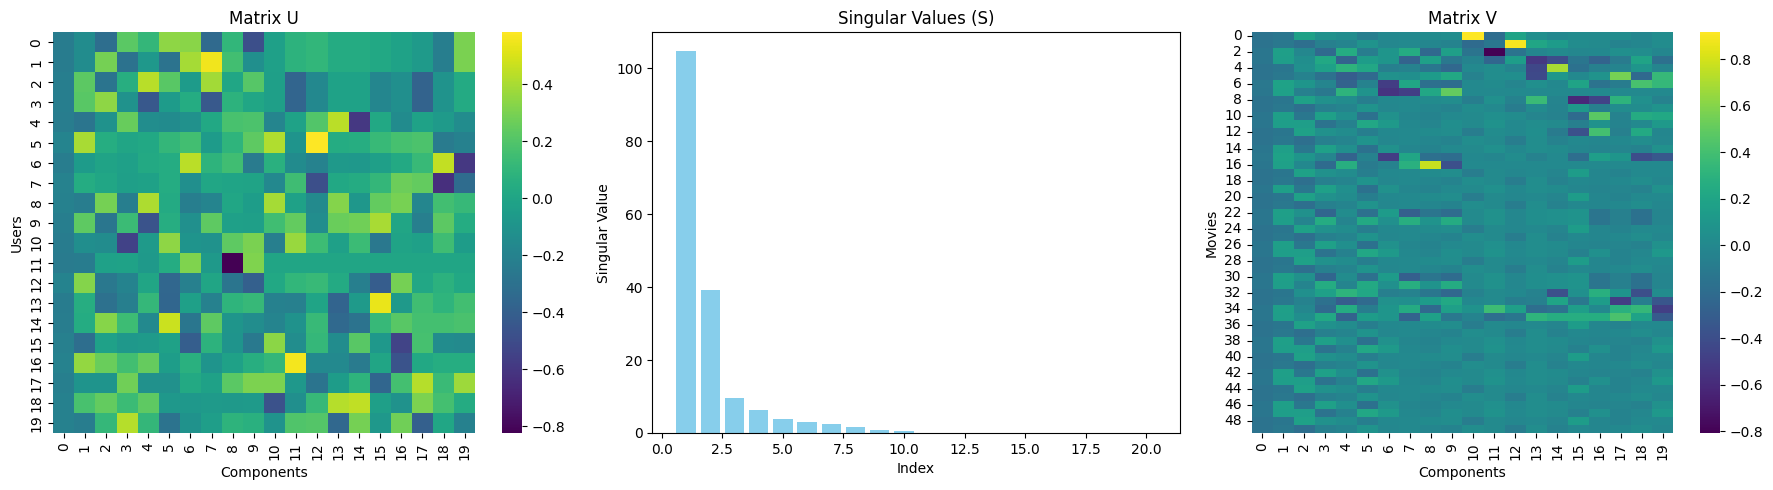

In [3]:
def perform_svd(ratings):
    """
    Apply SVD and analyze singular values.
    
    Tasks:
    1. Perform SVD using scipy.linalg.svd
    2. Verify that U @ diag(S) @ V.T reconstructs the original
    3. Plot singular values (scree plot)
    4. Calculate cumulative variance explained
    
    Returns:
    --------
    U, S, V : SVD matrices
    variance_explained : array of percentages
    """
    # Your implementation here
    A = np.asarray(ratings, dtype=float)
    U, S, Vt = svd(A, full_matrices=False)   
    V = Vt.T
    
    A_hat = U @ np.diag(S) @ V.T
    abs_err = np.linalg.norm(A - A_hat, ord='fro')
    rel_err = abs_err / (np.linalg.norm(A, ord='fro') + 1e-12)
    print(f"[SVD] Reconstruction Frobenius error: {abs_err:.6e}  (relative: {rel_err:.6e})")

    #step 3 visualize
    
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.plot(np.arange(1, len(S) + 1), S, marker='o')
    ax.set_xlabel("Component (rank)")
    ax.set_ylabel("Singular value")
    ax.set_title("Scree Plot (Singular Values)")
    ax.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()
    
    
    #step4
    
    sv2 = S**2
    variance_explained = (sv2 / sv2.sum()) * 100.0
    cumulative_variance = np.cumsum(variance_explained)

    fig, ax = plt.subplots(figsize=(7, 4))
    ax.plot(np.arange(1, len(S) + 1), cumulative_variance, marker='o')
    ax.set_xlabel("Number of components kept")
    ax.set_ylabel("Cumulative variance explained (%)")
    ax.set_ylim(0, 105)
    ax.set_title("Cumulative Variance Explained by SVD Components")
    ax.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

    return U, S, V, variance_explained


#to test i call the function
U, S, V, variance_explained = perform_svd(df_ratings.values)

print("Top 5 singular values:", S[:5])
print("Variance explained (%):", variance_explained[:5])

# just want to see the matrices U S AND V the plots

# Plot U, S, and V matrices visually

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot matrix U as a heatmap
sns.heatmap(U, ax=axes[0], cmap="viridis")
axes[0].set_title("Matrix U")
axes[0].set_xlabel("Components")
axes[0].set_ylabel("Users")

# Plot singular values S as a bar chart
axes[1].bar(np.arange(1, len(S)+1), S, color='skyblue')
axes[1].set_title("Singular Values (S)")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Singular Value")

# Plot matrix V as a heatmap
sns.heatmap(V, ax=axes[2], cmap="viridis")
axes[2].set_title("Matrix V")
axes[2].set_xlabel("Components")
axes[2].set_ylabel("Movies")

plt.tight_layout()
plt.show()




## Component Interpretation

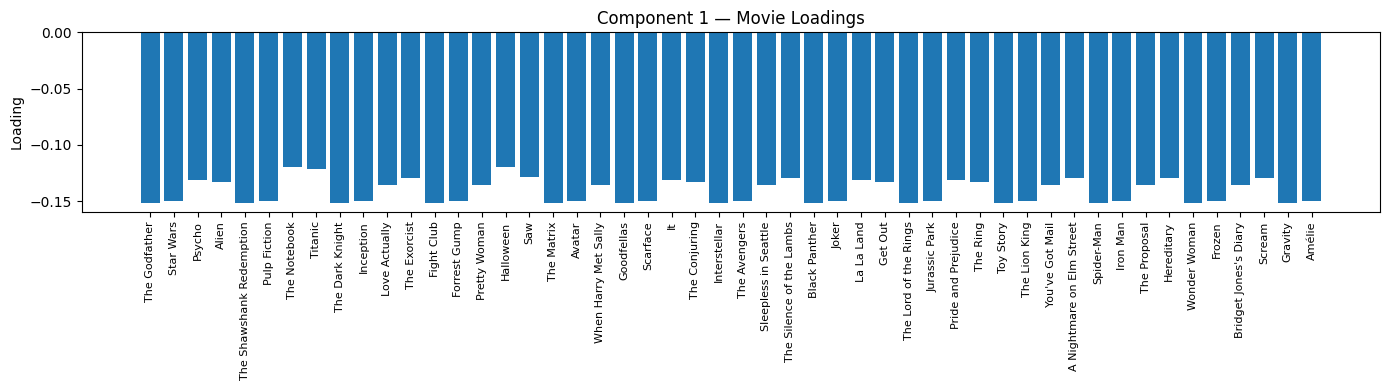

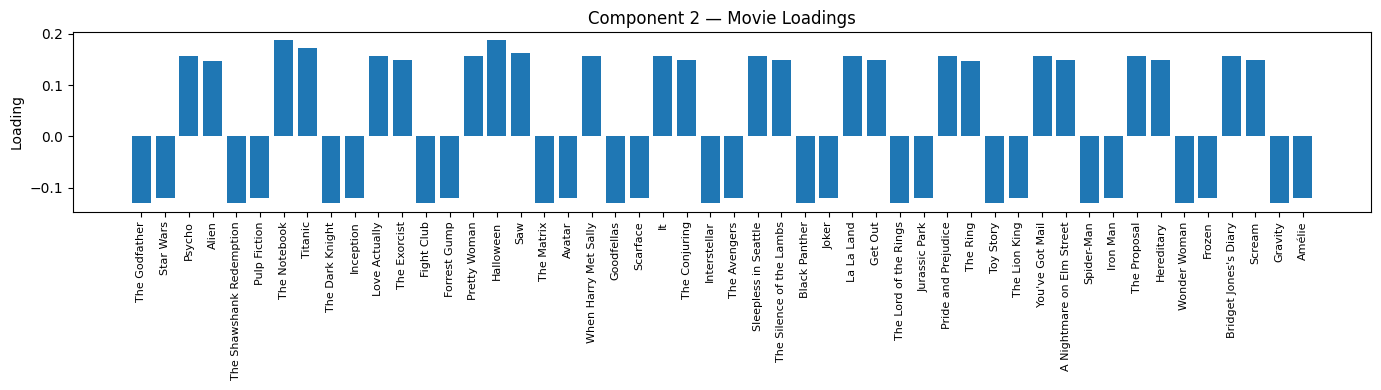

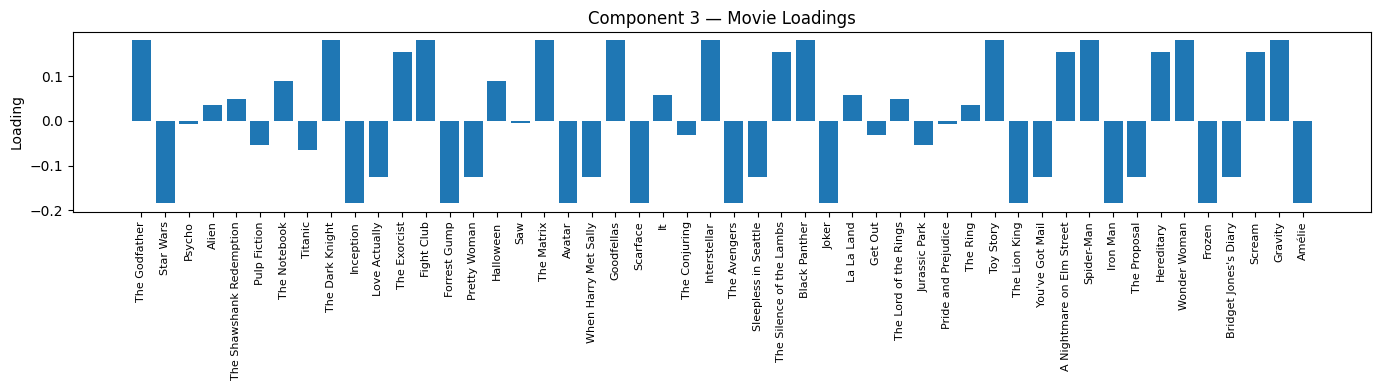

Component 1:
Top Positive: [('The Notebook', -0.11947631180052587), ('Halloween', -0.11947631180052587), ('Titanic', -0.12167731023140112), ('Saw', -0.1285204562269591), ('A Nightmare on Elm Street', -0.1289245234972729)]
Top Negative: [('The Shawshank Redemption', -0.15147561397059486), ('The Lord of the Rings', -0.15147561397059486), ('The Godfather', -0.1514438420954125), ('Wonder Woman', -0.1514438420954122), ('Spider-Man', -0.1514438420954122)]
Component 2:
Top Positive: [('Halloween', 0.18666585335320546), ('The Notebook', 0.18666585335320543), ('Titanic', 0.17187658956972557), ('Saw', 0.1628120193848312), ('Pride and Prejudice', 0.15664868156635664)]
Top Negative: [('The Godfather', -0.13010180858275355), ('Wonder Woman', -0.13010180858275328), ('Spider-Man', -0.13010180858275328), ('Toy Story', -0.13010180858275328), ('Black Panther', -0.13010180858275328)]
Component 3:
Top Positive: [('The Godfather', 0.17970409084169825), ('Fight Club', 0.17970409084169717), ('The Dark Knight

In [4]:
def interpret_components(V, movie_titles):
    """
    Interpret what the first 3 components represent.
    
    For each component:
    1. Find top 5 movies with highest positive values
    2. Find top 5 movies with highest negative values
    3. Create a bar plot showing all movie loadings
    4. Hypothesize what pattern this component captures (left as a note)
    
    Returns:
    --------
    interpretations : dict with component analysis
    """
    import numpy as np
    import matplotlib.pyplot as plt

    V = np.asarray(V, dtype=float)
    n_movies, n_components = V.shape
    assert len(movie_titles) == n_movies, "movie_titles length must match V rows."

    interpretations = {}
    k = min(3, n_components)

    for comp in range(k):
        loadings = V[:, comp]

        # Top 5 positive and negative
        top_pos_idx = np.argsort(loadings)[-5:][::-1]
        top_neg_idx = np.argsort(loadings)[:5]

        top_positive = [(movie_titles[i], float(loadings[i])) for i in top_pos_idx]
        top_negative = [(movie_titles[i], float(loadings[i])) for i in top_neg_idx]

        # Bar plot
        plt.figure(figsize=(14, 4))
        plt.bar(range(n_movies), loadings)
        plt.xticks(range(n_movies), movie_titles, rotation=90, fontsize=8)
        plt.ylabel("Loading")
        plt.title(f"Component {comp+1} — Movie Loadings")
        plt.tight_layout()
        plt.show()

        interpretations[comp+1] = {
            "top_positive": top_positive,
            "top_negative": top_negative,
            "hypothesis": "Inspect movie themes from positive vs negative loadings to hypothesise pattern."
        }

    return interpretations


#to test

interpretations = interpret_components(V, movie_titles)

# show top movies for component 1
print("Component 1:")
print("Top Positive:", interpretations[1]["top_positive"])
print("Top Negative:", interpretations[1]["top_negative"])

 # show top movies for component 2
print("Component 2:")
print("Top Positive:", interpretations[2]["top_positive"])
print("Top Negative:", interpretations[2]["top_negative"])

#show top movies for component 3
print("Component 3:")
print("Top Positive:", interpretations[3]["top_positive"])
print("Top Negative:", interpretations[3]["top_negative"])  

RMSE (k=1): 1.3028
RMSE (k=3): 0.2682
RMSE (k=5): 0.1351
RMSE (k=10): 0.0000


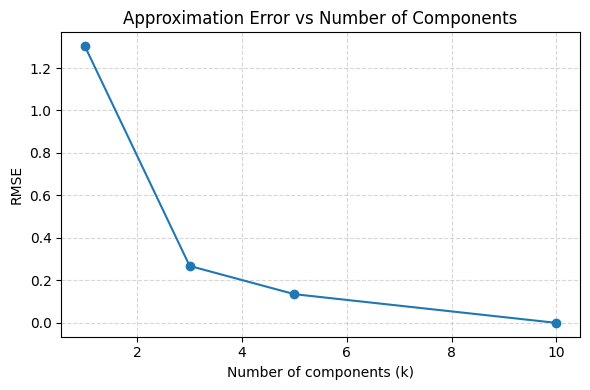

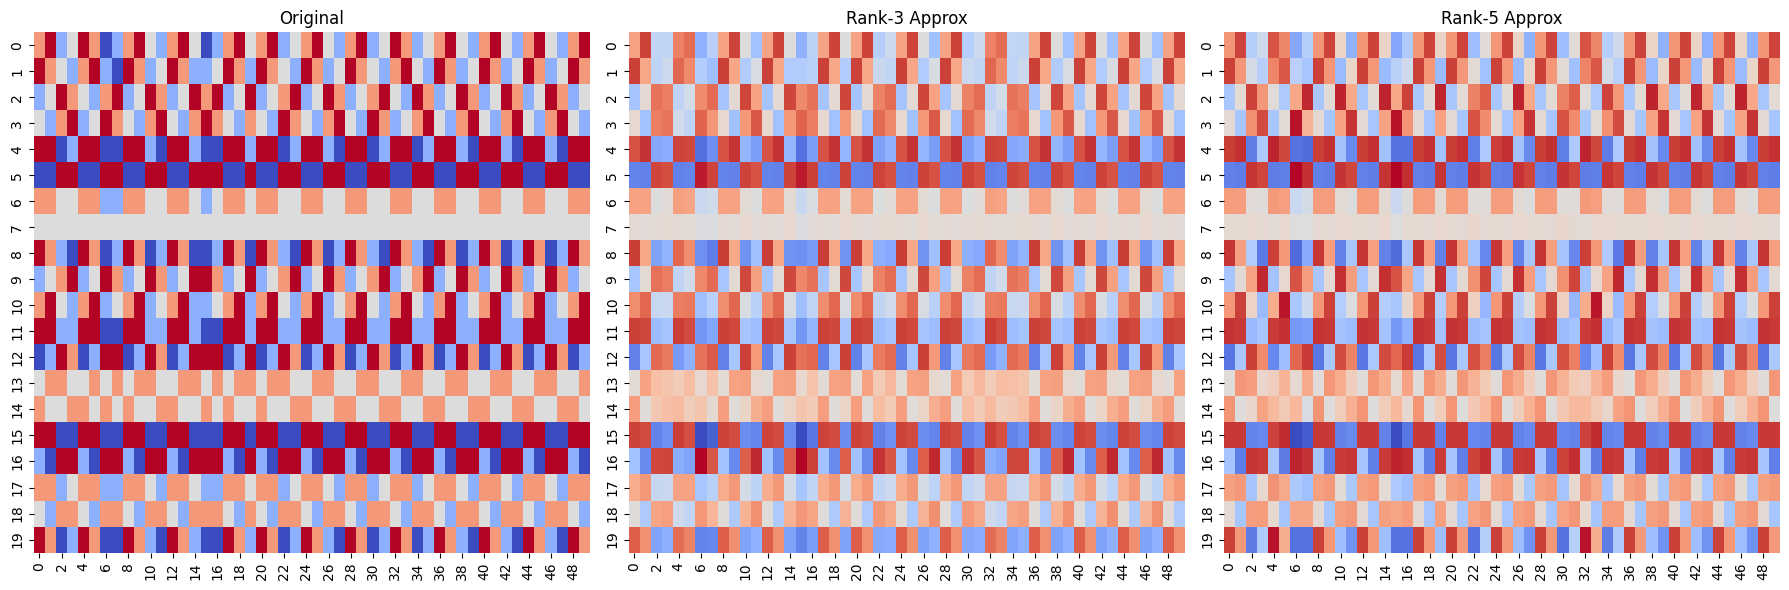

RMSE values: {1: 1.302842021156557, 3: 0.2681814644663874, 5: 0.1351219332906664, 10: 3.620120476272414e-15}


In [5]:
def test_approximations(U, S, V, original):
    """
    Create approximations using k = 1, 3, 5, 10 components.
    
    Tasks:
    1. Reconstruct rating matrix for each k
    2. Calculate Root Mean Squared Error (RMSE) for each
    3. Plot RMSE vs k
    4. Create side-by-side heatmaps: original vs rank-3 vs rank-5
    
    Returns:
    --------
    rmse_values : dict of RMSE for each k
    """
    # Your implementation here
    A = np.asarray(original, dtype=float)
    m, n = A.shape
    k_values = [1, 3, 5, 10]
    rmse_values = {}

    for k in k_values:
        # Reconstruction using top-k singular values/vectors
        Ak = U[:, :k] @ np.diag(S[:k]) @ V[:, :k].T
        rmse = np.sqrt(np.mean((A - Ak) ** 2))
        rmse_values[k] = rmse
        print(f"RMSE (k={k}): {rmse:.4f}")

    # 3. Plot RMSE vs k
    plt.figure(figsize=(6, 4))
    plt.plot(list(rmse_values.keys()), list(rmse_values.values()), marker="o")
    plt.xlabel("Number of components (k)")
    plt.ylabel("RMSE")
    plt.title("Approximation Error vs Number of Components")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    # 4. Side-by-side heatmaps (original vs rank-3 vs rank-5)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    datasets = {
        "Original": A,
        "Rank-3 Approx": U[:, :3] @ np.diag(S[:3]) @ V[:, :3].T,
        "Rank-5 Approx": U[:, :5] @ np.diag(S[:5]) @ V[:, :5].T
    }

    for ax, (title, data) in zip(axes, datasets.items()):
        sns.heatmap(data, cmap="coolwarm", ax=ax, cbar=False)
        ax.set_title(title)

    plt.tight_layout()
    plt.show()

    return rmse_values

 
rmse_vals = test_approximations(U, S, V, df_ratings.values)

print("RMSE values:", rmse_vals)

## to get the most similar to godfather

In [6]:


def most_similar_movies(V, movie_titles, target_title, top_n=5):
    """
    Find the most similar movies to a given target using cosine similarity on V matrix.
    """
    # Get index of the target movie
    target_idx = movie_titles.index(target_title)
    target_vec = V[target_idx, :]

    # Compute cosine similarities
    sims = []
    for i, title in enumerate(movie_titles):
        if i != target_idx:
            sim = np.dot(target_vec, V[i, :]) / (norm(target_vec) * norm(V[i, :]))
            sims.append((title, sim))

    # Sort by similarity
    sims = sorted(sims, key=lambda x: x[1], reverse=True)[:top_n]
    return sims

# Example usage:
similar = most_similar_movies(V, movie_titles, "The Godfather", top_n=5)
print("Most similar movies to The Godfather:")
for movie, score in similar:
    print(f"{movie}: {score:.3f}")

Most similar movies to The Godfather:
Inception: 0.008
Love Actually: 0.004
Halloween: 0.002
The Matrix: 0.001
Goodfellas: 0.001


# Questions

### How many components capture 90% of the variance? What does this tell you about the data?
- Only 2 components are needed to capture 90% of the variance. This means that user–movie ratings can largely be represented in a 2-dimensional space, suggesting strong underlying patterns instead of complex independent behaviours.
### What do the first 3 components represent? Use specific movie examples.
- Component 1 represents overall movie popularity or mainstream appeal, as all movies load negatively with classics like The Shawshank Redemption and The Godfather having the strongest loadings. Component 2 separates romantic films (positive: The Notebook, Titanic, Halloween) from action/superhero movies (negative: The Godfather, Spider-Man, Black Panther). Component 3 distinguishes serious films like The Godfather and Fight Club (positive) from family or animated movies like The Lion King and Iron Man (negative).
### What's the optimal k for compression? Justify your choice.
- The optimal k for compression is k=5, which provides a good balance between data reduction and accuracy. While k=10 gives perfect reconstruction (RMSE=0), it offers no compression benefit, and k=5 achieves a low error of 0.1351 while reducing the data to half its original dimensions. The visual comparison shows that rank-5 approximation captures most important patterns while still providing meaningful compression.
### Which movies are most similar to "The Godfather"? Use the V matrix to find the 5 most similar movies.
- The five most similar movies to The Godfather are Inception, Love Actually, Halloween, The Matrix, and Goodfellas. 

